In [21]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [22]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

Unnamed: 0 operation property_type     place_name  \
68674        68674      sell         house        Adrogué   
63414        63414      sell     apartment  Mar del Plata   
85062        85062      sell     apartment   Villa Crespo   
15238        15238      sell     apartment        Rosario   
121162      121162      sell     apartment        Córdoba   
75234        75234      sell         house  Vicente López   

                                  place_with_parent_names country_name  \
68674   |Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...    Argentina   
63414   |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
85062            |Argentina|Capital Federal|Villa Crespo|    Argentina   
15238                        |Argentina|Santa Fe|Rosario|    Argentina   
121162                                |Argentina|Córdoba|    Argentina   
75234   |Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...    Argentina   

                          state_name  geonames_id                  lat-lon  \
68674         Bs.As. G.B.A. Zona Sur          NaN                      NaN   
63414   Buenos Aires Costa Atlántica    3430863.0  -38.0010401,-57.5453418   
85062                Capital Federal    3427458.0                      NaN   
15238                       Santa Fe    3838574.0  -32.9504184,-60.6529144   
121162                       Córdoba    3860255.0                      NaN   
75234       Bs.As. G.B.A. Zona Norte          NaN                      NaN   

              lat  ...  surface_covered_in_m2  price_usd_per_m2  price_per_m2  \
68674         NaN  ...                  185.0       1090.909091   1297.297297   
63414  -38.001040  ...                   76.0       1133.333333   1118.421053   
85062         NaN  ...                   47.0       2659.574468   2659.574468   
15238  -32.950418  ...                   38.0               NaN  39973.684211   
121162        NaN  ...                    NaN       1930.321860           NaN   
75234         NaN  ...                  273.0       1630.434783   1648.351648   

        floor  rooms  expenses  \
68674     NaN    NaN       NaN   
63414     NaN    3.0       NaN   
85062     NaN    NaN       NaN   
15238     NaN    NaN       NaN   
121162    NaN    NaN       NaN   
75234     NaN    NaN       NaN   

                                            properati_url  \
68674   http://www.properati.com.ar/1ah72_venta_casa_a...   
63414   http://www.properati.com.ar/1a8si_venta_depart...   
85062   http://www.properati.com.ar/1b2jj_venta_depart...   
15238   http://www.properati.com.ar/16ugu_venta_depart...   
121162  http://www.properati.com.ar/1cj5x_venta_depart...   
75234   http://www.properati.com.ar/1aq0a_venta_casa_v...   

                                              description  \
68674   CHALET DE 2 PLANTAS EN LA CALLE COMBATIENTES D...   
63414   DEPARTAMENTO UBICADO EN SANTA FE E/RIVADAVIA Y...   
85062   EXCELENTE DEPARTAMENTO 2 AMBIENTES A ESTRENAR ...   
15238   Este proyecto está frente al parque independen...   
121162  UBICACIÓNEstratégicamente ubicado en calle Obi...   
75234   IMPECABLE CASA ESTILO TUDOR CON MUY BUENA UBIC...   

                                                    title  \
68674         CHALET 4 AMBIENTES PROXIMO  A ADROGUE CHICO   
63414   VENDE DEPARTAMENTO 3 AMBIENTES  CON DEPENDENCI...   
85062                         Departamento - Villa Crespo   
15238                   Dptos. Mono ambientes Moreno 2047   
121162                       Departamento - Nueva Cordoba   
75234   IMPECABLE CASA ESTILO TUDOR CON MUY BUENA UBIC...   

                                          image_thumbnail  
68674   https://thumbs4.properati.com/3/yepmZMFXiKjcYp...  
63414   https://thumbs4.properati.com/2/bSkAyDxKPrNoAi...  
85062   https://thumbs4.properati.com/2/RIEQkYBIOzdY0z...  
15238   https://thumbs4.properati.com/1/eCp48x0xI317r3...  
121162  https://thumbs4.properati.com/4/yu38CR5Lw5bGhl...  
75234   https://thumbs4.properati.com/6/pauyeIxc5naGp-...  

[6

(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [23]:
# Columna price_aprox_usd: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_aprox_usd.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_usd.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_usd']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_usd  count
0                 0.00      1
1              4666.62      1
2              4952.45      1
3              5000.00      2
4              5047.53      5
...                ...    ...
10359      16000000.00      1
10360      19500000.00      1
10361      22980378.29      1
10362      25000000.00      1
10363      46545445.00      1

[10364 rows x 2 columns]


<AxesSubplot:xlabel='property_type'>

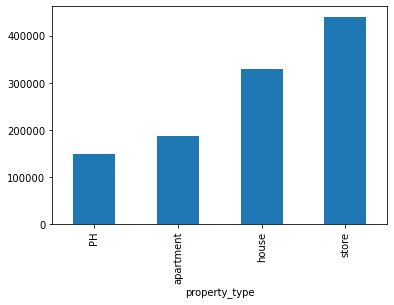

In [24]:
#graficamos el dato por tipo de propiedad con el fin de observar los rangos de precios. En esta grafica podemos observar la variación en la media de los precios que existe de acuerdo al tipo de vivienda.
data.groupby('property_type')['price_aprox_usd'].mean().plot.bar()

In [25]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos 
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos con 
# un apartamento ubicado en la latitul -34.62 y lon -58.37 con un precio de 46 millones de dolares (corresponde a un apartamento ubicado en San Telmo con una superficie total de 200.000 m2 
import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='price_aprox_usd',
                    color='property_type')
fig.show()

In [26]:
data.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

### Detalle de análisis de columna `price_aprox_usd`:

* `price_aprox_usd` -> Esta columna tiene 20.410 datos nulos o su equivalente 16,83%. Consideramos que esta variable es relevante para la proyección, teniendo en cuenta que el valor por metro cuadrado cubierto y total estan calculados en esta moneda, observamos un valor máximo de 46,545,445 alejado significativamente de la media que es de 239,700.
Esta columna podriamos completarla realizando diferentes operaciones:
 
1. Extrayendo este dato de las columnas description y title
2. Diviendo el precio total en usd por el precio del metro cuadrado

### Detalle de valores extremos en la  columna `price_aprox_usd`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencias valores muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

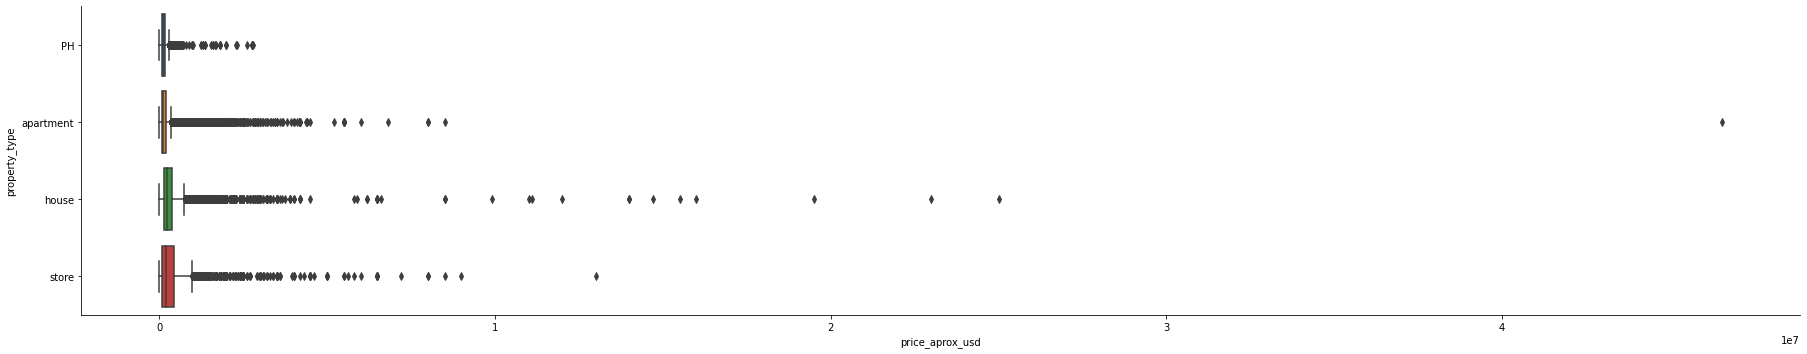

In [27]:
sns.catplot(data=data, x= 'price_aprox_usd', y="property_type", kind="box", height=5, aspect=5,)


### Regex para rellenar la columna `price_aprox_USD`:

Vamos a extraer datos de las columnas title y description para esto tomamos las diferentes expresiones de la moneda U$D, USD, usd, us$, U$S

In [28]:
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'U\$D\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|USD\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|usd\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|us\$d\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|U\$S\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)'

regex = re.compile(patron, flags = re.IGNORECASE)

precio_aprox_usd_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_titulo, inplace=True)

precio_aprox_usd_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_descripcion, inplace=True)


In [31]:
#Al aplicar regex a la columna, se lograron reducir los nan pasando del 16.83% al 14.02%.
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_usd.isna().sum()/data.price_aprox_usd.shape[0]*100}')
print (f'entradas: {data.price_aprox_usd.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 14.02986305890117
entradas: 121220


### Conclusión `price_aprox_usd`:

Aunque aplicando regex logramos rellenar algunos datos, no podemos tomar el dato porque nos está trayendo valores errados como propiedades con precios de U$1 y tambien porque existen U$ para valorar otros campos. Por esta razón no vamos a emplearlo.

Esta columna se mantiene y se calculara el valor tomando la superficie total y el price-usd_per_m2